In [24]:
#importing the neccessary libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing

Q1: Dataset Structure and Cleaning
Load the dataset using Pandas and display the first 3 rows. Determine the total number of rows and columns, and list the data types of each column. Check for any missing values in the dataset and briefly explain how you would handle them if found.

In [25]:
Patient_record=pd.read_csv(r"C:\Users\BAPS\Downloads\medical.csv")
Patient_record.head(3)
#This are the first three rows of the dataset

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620


In [26]:
Patient_record.shape
#There are total of 1338 rows and 7 columns 

(1338, 7)

In [27]:
Patient_record.info()
    # OBSERVATION -> Columns -sex,smoker and region are object columns i.e. it has string values
    #                Columns - age and childer has int64 datatype
    #                Columns - bmi and charges has float64 datatype 
    #  And there not any null values in the dataset and there are 1338 records              

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [28]:
missing_values=Patient_record.isnull().sum()
missing_values
# Here also we have cross checked that there not any null values present in the dataset

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [29]:
"""
If there were null values present in the dataset i would have replaced the missing values with the median or mean
    of the column, this decision is based on the which method aligns with the central tendency of the data,but in 
    most of the cases median is used as it helps us to better handle with the skewness of the data 
"""

'\nIf there were null values present in the dataset i would have replaced the missing values with the median or mean\n    of the column, this decision is based on the which method aligns with the central tendency of the data,but in \n    most of the cases median is used as it helps us to better handle with the skewness of the data \n'

Q2: Simulate a 2D random walk using NumPy for a given number of steps. Plot the path of the walk using Matplotlib.


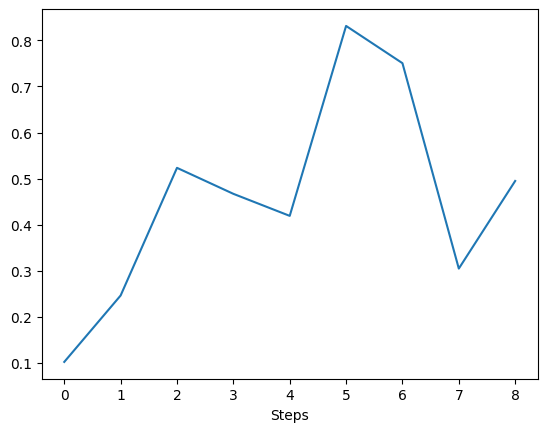

In [30]:
try:
    number_of_steps=int(input("enter the number of steps: "))   #asking the user about the number of steps
    random_path=np.random.random(size=(1,number_of_steps+1))  # creating a 2d numpy array which is of size as entered by user and it has random values 
    random_path=np.diagflat(random_path)    # using this so that the values appears only on the diagonal of the array
    plt.figure()
    plt.plot(np.diag(random_path))  
    plt.xlabel("Steps")
    plt.show()
except ValueError:      #Handling the errors
    print("Please enter numeric only")

Q3. Write a Python script that takes a sentence as input via the command line and produces a histogram of word lengths. Implement the following steps using NumPy:

	* Tokenize the sentence into individual words.
	* Calculate the length of each word in the sentence.
	* Create a histogram of word lengths, where the x-axis represents the length of words and the y-axis represents the frequency of words with that length.
	* Print the histogram in a readable format.

Text(0, 0.5, 'Frequency')

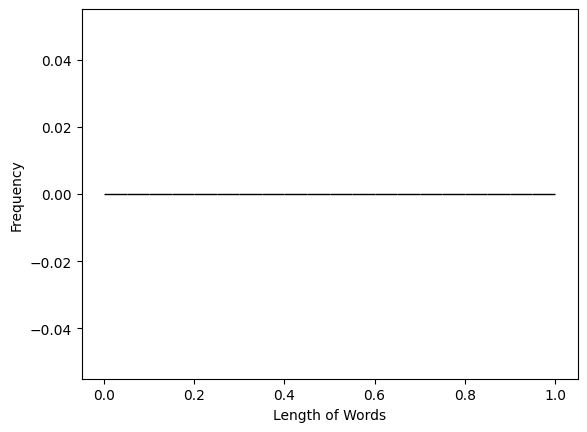

In [31]:
input_sentence=input("Please enter the sentence")
tokenized_sentence=input_sentence.split()
length_of_sentence=[len(i) for i in (tokenized_sentence)]
length_of_sentence

plt.hist(length_of_sentence,edgecolor="black",bins=20)
plt.xlabel("Length of Words")
plt.ylabel("Frequency")

Q4: Data Visualization
1. Using appropriate visualization tools, create a bar plot comparing the average medical charges between smokers and non-smokers. 
2. Draw a box plot to show the distribution of charges across genders. 
3. Then, generate a scatter plot between BMI and charges, with points colored based on smoker status. 
4. Briefly describe any trends or patterns you observe from the scatter plot.

Text(0, 0.5, 'Average Charges')

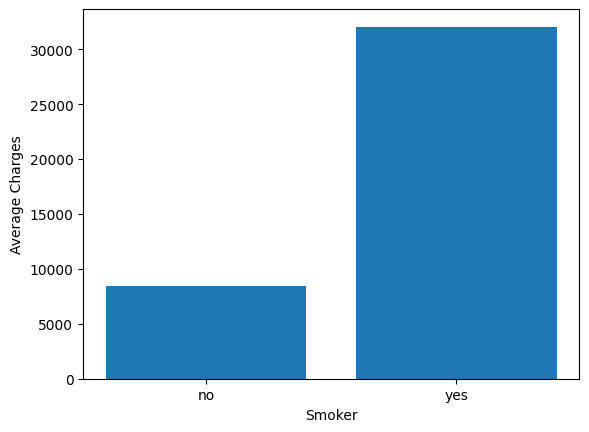

In [32]:
is_smoker=Patient_record.groupby("smoker").agg(average_medical_charge=('charges','mean'))   #grouping of data based on the smoker status 
is_smoker=is_smoker.reset_index()   #reseting the index so that we can get gender back as an column 
plt.bar(is_smoker["smoker"],is_smoker["average_medical_charge"])    #Plotting the bar plot of the data
plt.xlabel("Smoker")            #labelling the x axis
plt.ylabel("Average Charges")   #Labeling the y axis

<Axes: xlabel='sex', ylabel='total_charge'>

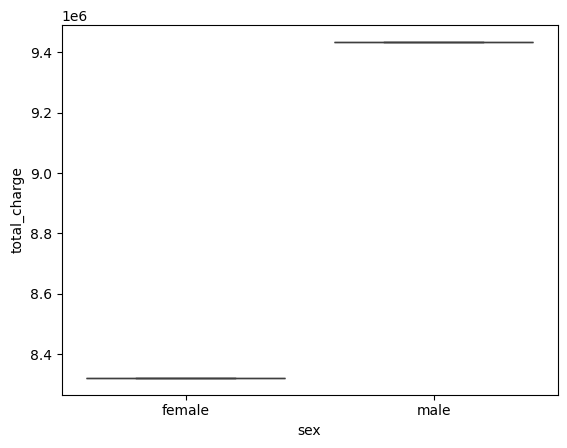

In [33]:
charges_across_gender=Patient_record.groupby("sex").agg(total_charge=('charges','sum')) #grouping by gender and calculating the sum of charges of each gender
charges_across_gender=charges_across_gender.reset_index()   #resting the index
sns.boxplot(x=charges_across_gender["sex"],y=charges_across_gender['total_charge']) #plotting the box plot

<Axes: xlabel='sex', ylabel='charges'>

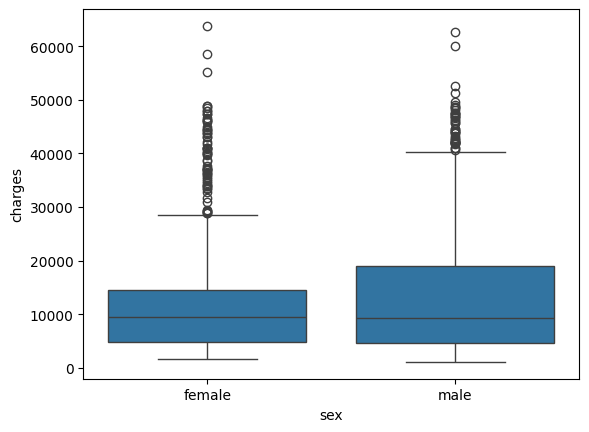

In [34]:
sns.boxplot(x=Patient_record["sex"],y=Patient_record['charges']) #plotting the box plot

<Axes: xlabel='bmi', ylabel='charges'>

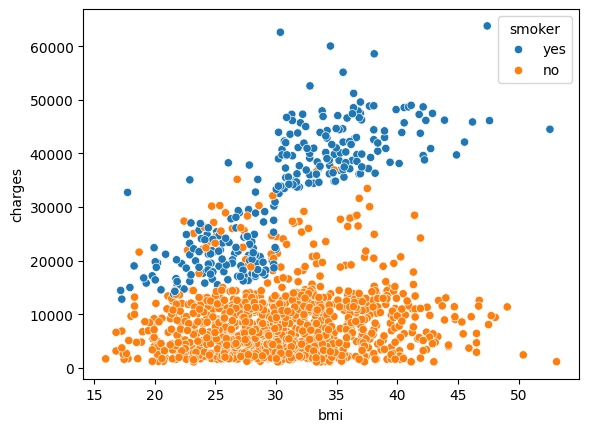

In [35]:
sns.scatterplot(x=Patient_record['bmi'],y=Patient_record["charges"],hue=Patient_record["smoker"])   
#creating the scatter plot between bmi and charges and points are colored on the basis of smoker status

In [36]:
# Observation -> The People who smoke have average high medical costs as compared people who don't smoke even when the BMI is similar

Q5: NumPy and Conditional Data Analysis
- Using NumPy and filtering techniques, perform the following tasks on a medical dataset containing columns like age, sex, bmi, children, smoker, region, and charges: 
1. Normalize the charges column between 0 and 1 using Min-Max normalization. 
2. Calculate the percentage of individuals whose charges are above the average.
3. Identify the youngest smoker and report their charges.
4. Finally, compute the average BMI of females who have more than one child.

In [37]:
total_charges=Patient_record["charges"].sum()
average_charges=total_charges/len(Patient_record)

In [38]:
medical_bills_above_average=Patient_record['charges']>average_charges   #Conditon for identifying the patients who has medical bills above average
Patient_above_average_charges=Patient_record.where(medical_bills_above_average,inplace=False)   #puting the condtion in the Data and creating a new DataFrame of the datpoints which satisfy the condition
Patient_above_average_charges=Patient_above_average_charges.dropna()        #dropping the null values 
Patient_above_average_charges

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0.0,yes,southwest,16884.92400
3,33.0,male,22.705,0.0,no,northwest,21984.47061
9,60.0,female,25.840,0.0,no,northwest,28923.13692
11,62.0,female,26.290,0.0,yes,southeast,27808.72510
14,27.0,male,42.130,0.0,yes,southeast,39611.75770
...,...,...,...,...,...,...,...
1318,35.0,male,39.710,4.0,no,northeast,19496.71917
1321,62.0,male,26.695,0.0,yes,northeast,28101.33305
1323,42.0,female,40.370,2.0,yes,southeast,43896.37630
1328,23.0,female,24.225,2.0,no,northeast,22395.74424


In [39]:
Youngest_smoker_age=Patient_record['age']==Patient_record['age'].min()
Youngest_smoker=Patient_record.where(Youngest_smoker_age,inplace=False)
Youngest_smoker=Youngest_smoker.dropna()
# Youngest_smoker["charges"].sum()
Youngest_smoker1=Youngest_smoker[Youngest_smoker['smoker']=='yes']
Youngest_smoker1
Youngest_smoker["charges"].sum()

np.float64(488949.011389)

In [40]:
con1=Patient_record["sex"]=="female"
con2=Patient_record['children']>1
female_bmi=Patient_record.where(con1,inplace=False)
female_bmi=female_bmi.where(con2,inplace=False)
female_bmi.dropna()

,age,sex,bmi,children,smoker,region,charges
7,37.0,female,27.740,3.0,no,northwest,7281.50560
25,59.0,female,27.720,3.0,no,southeast,14001.13380
27,55.0,female,32.775,2.0,no,northwest,12268.63225
32,19.0,female,28.600,5.0,no,southwest,4687.79700
36,62.0,female,32.965,3.0,no,northwest,15612.19335
...,...,...,...,...,...,...,...
1319,39.0,female,26.315,2.0,no,northwest,7201.70085
1323,42.0,female,40.370,2.0,yes,southeast,43896.37630
1328,23.0,female,24.225,2.0,no,northeast,22395.74424
1330,57.0,female,25.740,2.0,no,southeast,12629.16560


In [41]:
female_bmi["bmi"].mean()

np.float64(30.63846511627907)

In [42]:
encoder = LabelEncoder()
Patient_record['sex']=encoder.fit_transform(Patient_record["sex"])
Patient_record['smoker']=encoder.fit_transform(Patient_record["smoker"])
Patient_record['region']=encoder.fit_transform(Patient_record["region"])

In [43]:
scaler = preprocessing.MinMaxScaler()
minmax_df = scaler.fit_transform(Patient_record)
minmax_df = pd.DataFrame(minmax_df, columns =Patient_record.columns)

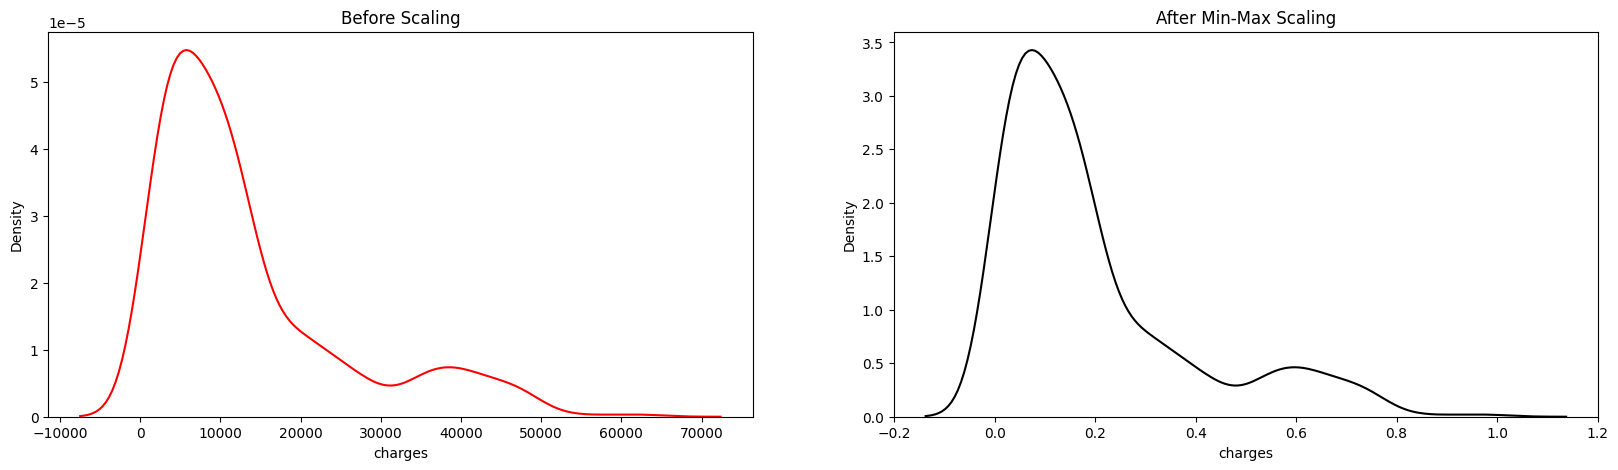

In [44]:
fig, (ax1,ax4) = plt.subplots(ncols = 2, figsize =(20, 5))
ax1.set_title('Before Scaling')
sns.kdeplot(Patient_record["charges"], ax = ax1, color ='r')
ax4.set_title('After Min-Max Scaling')
sns.kdeplot(minmax_df["charges"], ax = ax4, color ='black')
plt.show()